In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
# Add the directory containing diffusive_nested_sampling to sys.path
sys.path.append(os.path.abspath( "../.."))
import spike_and_slab

In [3]:
def log_likelihood(x):
    '''
    20-D spike and slab likelihood function

    @param x : coordinate
    @return L : likelihood
    '''
    u = 0.01
    v = 0.1

    # Spike
    t1 = np.sum(-0.5 * (x / v) ** 2) - x.size * np.log(v * np.sqrt(2 * np.pi))
    
    # Slab
    t2 = np.sum(-0.5 * ((x - 0.031) / u) ** 2) - x.size * np.log(u * np.sqrt(2 * np.pi)) + np.log(100.0)

    logL = np.logaddexp(t1, t2)
    return logL

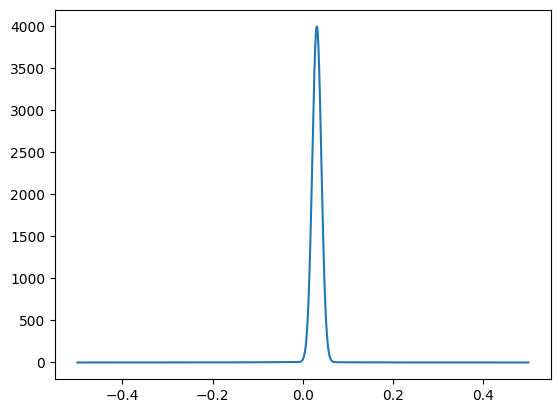

In [4]:
x = np.linspace(-0.5, 0.5, 10000)
y = np.exp([log_likelihood(x_i) for x_i in x])
plt.plot(x, y)
# plt.plot(x, y_spike)
# plt.plot(x, y_slab)
plt.show()

In [5]:
chain, levels, js = spike_and_slab.main()

/home/tom-egg/Research/nested_sampling/diffusive_nested_sampling/levels.py:24: RuntimeWarning: divide by zero encountered in log
  self.levels = [Level(0, np.log(0.0), prev=None)]    # levels are initialized with index, logL, and a previous logX if exists
100%|██████████| 500/500 [15:28<00:00,  1.86s/it]


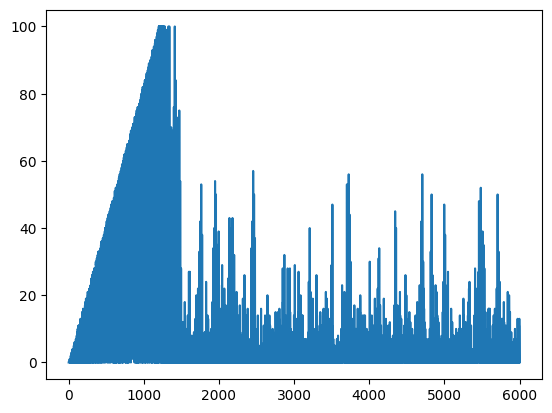

In [6]:
y = js
x = range(len(y))
plt.plot(x, y)
plt.show()

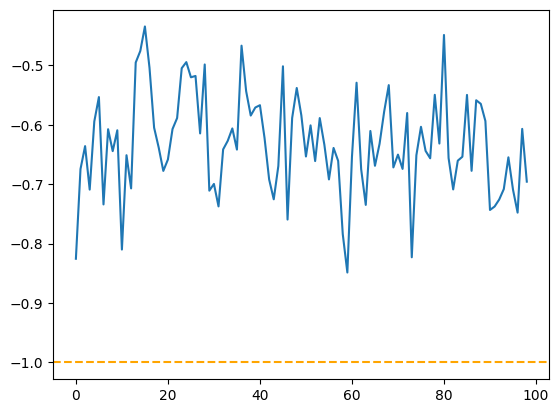

In [7]:
list_levels = [levels.get_level(i) for i in range(levels.max_J)]
Xs = np.array([level.get_log_X for level in list_levels])
y = Xs[1:] - Xs[:-1]
x = range(len(y))
plt.plot(x, y)
plt.axhline(y=-1.0,linestyle='--', color='orange')
plt.show()

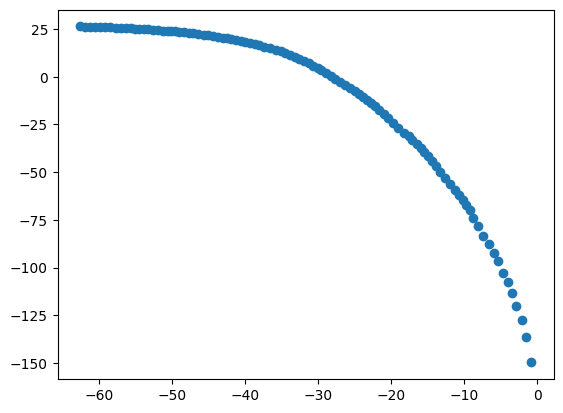

In [8]:
logL = [level.log_likelihood_bound for level in list_levels]
logX = [level.get_log_X for level in list_levels]
plt.scatter(logX, logL)

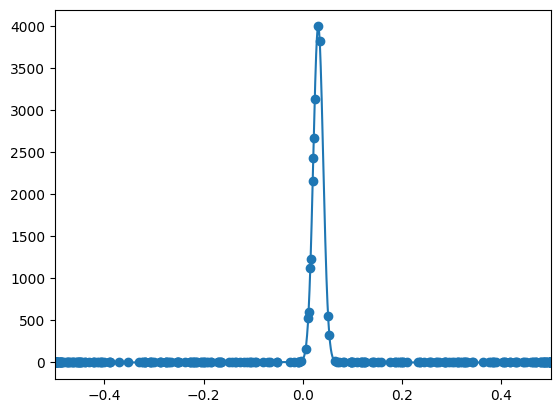

In [9]:
pos = chain['x'][-400:][:,6]
x = np.linspace(-0.5, 0.5, 10000)
y = np.exp([log_likelihood(x_i) for x_i in x])
plt.plot(x, y)
plt.scatter(pos, [np.exp(log_likelihood(position)) for position in pos])
#plt.ylim(0, 10)
plt.xlim(-0.5, 0.5)
plt.show()

In [11]:
print([level.log_likelihood_bound for level in list_levels])
print([level.total_visits for level in list_levels])

[np.float64(-inf), np.float64(-92.28902303079389), np.float64(-79.05028162364249), np.float64(-70.17163667611796), np.float64(-62.734324096694486), np.float64(-56.598275022133095), np.float64(-52.218827802890104), np.float64(-47.39719220077806), np.float64(-43.358010399089686), np.float64(-38.4469740829433), np.float64(-34.636346264223434), np.float64(-31.179248516231738), np.float64(-28.111091033639976), np.float64(-25.846627640055644), np.float64(-22.616792512641073), np.float64(-20.64524515025134), np.float64(-18.93857054844944), np.float64(-16.865548898459934), np.float64(-14.434697776048248), np.float64(-12.22154783068893), np.float64(-10.554265512118318), np.float64(-8.884642560000882), np.float64(-7.066292630053115), np.float64(-4.951211272682709), np.float64(-3.14335547738255), np.float64(-1.947162735326362), np.float64(-0.4449327319995575), np.float64(0.8611566255187169), np.float64(2.107174888778763), np.float64(3.229100572527167), np.float64(3.961249841978413), np.float64(4.

In [14]:
list_levels[4].level_weight(levels.current_max_J, 10.0, levels.max_J)

np.float64(2.752111752684545)

In [15]:
list_levels[4].get_log_X

np.float64(-2.752111752684545)